<a href="https://colab.research.google.com/github/shafkat2/Generative_neural_network/blob/master/TF_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


***Imports***

In [0]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
!pip install xlrd
#!pip install tensorflow-gpu


In [0]:
#!docker pull tensorflow/tensorflow   

In [0]:
#!ls "/content/drive/My Drive/Machine_Learning/CSE499VTS/"\
#!ls "/content/drive/My Drive/CSE499.A"

***Data Preprocessing Part1***

In [0]:
df = pd.read_excel('/content/drive/My Drive/Machine_Learning/CSE499VTS/data_test_2.xlsx',sheet_name = "Device Log Data",index = False)
dt = pd.read_excel('/content/drive/My Drive/Machine_Learning/CSE499VTS/data_test_3.xlsx',sheet_name = "Device Log Data",index = False)
#df = pd.read_csv('/content/drive/My Drive/CSE499.A/onlyADC.csv')
print(dt.shape)


(14047, 22)


(24641, 1)

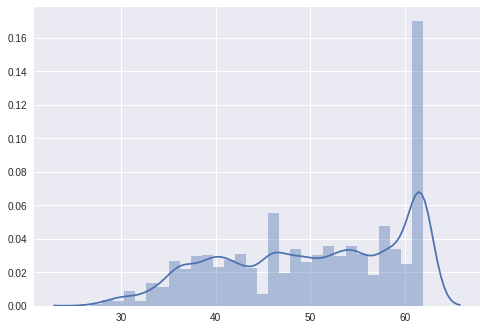

In [0]:
dp = df[['fuel_litre']].astype(float)
dt = dt[['fuel_litre']].astype(float)
dp = dp.append(dt, ignore_index=True)
#dp.reset_index(drop=True, inplace=True)
dp = dp[dp.fuel_litre != 0]
sns.distplot(dp,bins=30)
dp.shape

***Train Test Split***

In [0]:

X_train, X_test = train_test_split( dp,test_size=0.09,shuffle = False)

#X_train.reset_index(drop=True, inplace=True)
#X_test.reset_index(drop = True , inplace = True)

#noise_train = np.random.normal(0,5,[22423,1])
#noise_train = noise_train + X_train
noise_train = X_train
#noise_test = np.random.normal(0,10,[2218,1])
#noise_test = noise_test + X_test
noise_test =  X_test


# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(dp)

# Run the normalizer on the dataframe
#df_normalized = pd.DataFrame(x_scaled)

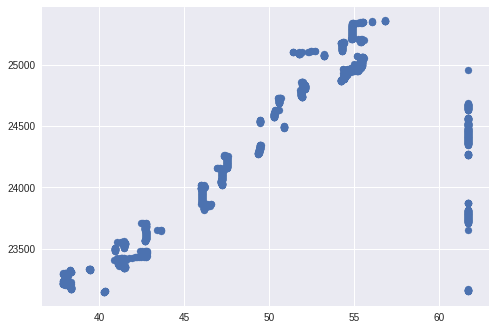

In [0]:
X_test.head()
plt.scatter(X_test["fuel_litre"], X_test.index)

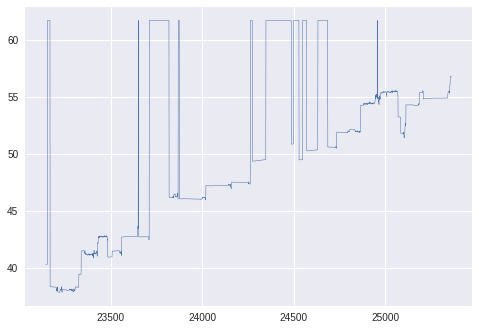

In [0]:
dt = df[['fuel_litre']]  
t = X_test.index
s = X_test.values
line, = plt.plot(t, s, lw=0.5)



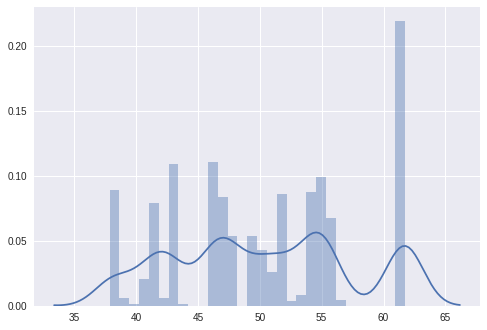

In [0]:
sns.distplot(X_test,bins=30)

***MinMaxScaler(Data Preprocessing)***

In [0]:
def  minMaxScaler(Df):
  # Create a minimum and maximum processor object
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(Df)
  df_normalized = pd.DataFrame(x_scaled)
  return df_normalized

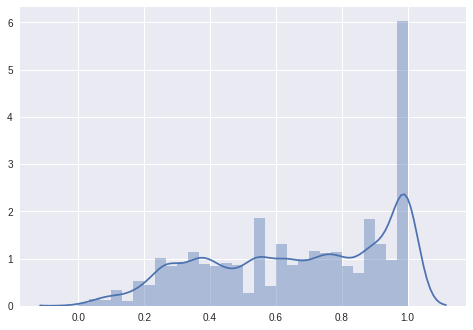

In [0]:


# Run the normalizer on the dataframe
df_normalized_train = minMaxScaler(X_train)
sns.distplot(df_normalized_train,bins=30)
count_row =  df_normalized_train.shape[0]




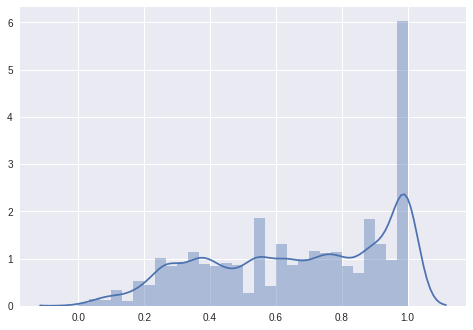

In [0]:
df_normalized_train_noise = minMaxScaler(noise_train)
sns.distplot(df_normalized_train_noise,bins=30)




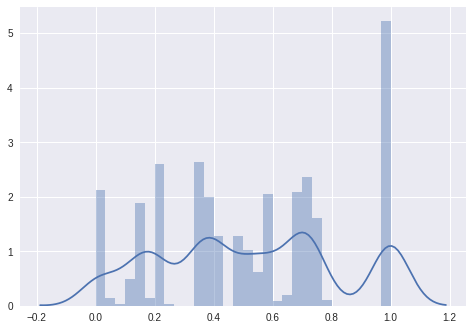

In [0]:


df_normalized_test_noise = minMaxScaler(noise_test)
sns.distplot(df_normalized_test_noise,bins=30)


***Data Preprocessing Part 2***

In [0]:
#ds = pd.DataFrame(np.random.randint(-3,2,size=(1218, 1)), columns=list('A'))
#ds = ds['A'].astype(float)
#ds = ds.values.reshape(1218,1)
#ds

In [0]:
#sns.distplot(ds,bins=30)

***Generator***

In [0]:
def generator(z,reuse = None):
  with tf.variable_scope('gen', reuse = reuse):
    hidden1 = tf.layers.dense(inputs = z , units = 4)
    hidden1= tf.nn.leaky_relu(hidden1,alpha = 0.01,name = None)
    hidden2 = tf.layers.dense(inputs = hidden1, units =4)
    hidden2 = tf.nn.leaky_relu(hidden2,alpha = 0.01,name = None)
    hidden3= tf.layers.dense(inputs = hidden2, units =4)
    hidden3= tf.nn.leaky_relu(hidden3,alpha = 0.01,name = None)
    output = tf.layers.dense(hidden3,units = 1,activation = tf.nn.tanh)
    
    return output
  
    

***Discrminator***

In [0]:
def discriminator(x,reuse = None):
  with tf.variable_scope('dis', reuse = reuse):
    hidden1 = tf.layers.dense(inputs = x , units = 4)
    hidden1= tf.nn.leaky_relu(hidden1,alpha = 0.01,name = None)
    hidden2 = tf.layers.dense(inputs = hidden1, units =4)
    hidden2 = tf.nn.leaky_relu(hidden2,alpha = 0.01,name = None)
    hidden3= tf.layers.dense(inputs = hidden2, units =4)
    hidden3= tf.nn.leaky_relu(hidden3,alpha = 0.01,name = None)
    
    logits = tf.layers.dense(hidden3,units = 1)
    output = tf.sigmoid(logits)
    
    return output,logits
  

***Dataplace holder***

In [0]:
real_Fuel_data = tf.placeholder(tf.float64,shape=[None, 1])
noisey_fuel_data = tf.placeholder(tf.float64,shape=[None, 1])


***Calling generator and discriminator***

In [0]:
gan_model = tfgan.gan_model(
    generator_fn,
    discriminator_fn,
    real_data=real_Fuel_datas,
    generator_inputs=tf.random_normal([batch_size, 1]))

# Sanity check that generated images before training are garbage.
check_generated_digits = tfgan.eval.image_reshaper(
    gan_model.generated_data[:20,...], num_cols=10)
visualize_digits(check_generated_digits)


***Loss Function***

In [0]:

def loss_func(logits_in,labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_in,labels = labels_in))

def wgan_loss(logits_real, logits_fake, batch_size,real_Fuel_data,G_sample):
    d_loss =- tf.reduce_mean(logits_real) + tf.reduce_mean(logits_fake)
    g_loss =- tf.reduce_mean(logits_fake)
    
    lam = 10
    
    eps = tf.random_uniform([batch_size,1], minval=0,maxval=1.0,dtype= tf.float64)
    x_h = eps*real_Fuel_data+(1-eps)*G_sample
    
    with tf.variable_scope("", reuse=True) as scope:
        grad_d_x_h = tf.gradients(discriminator(x_h,reuse = True), x_h)
    
    grad_norm = tf.norm(grad_d_x_h[0], axis=1, ord='euclidean')
    grad_pen = tf.reduce_mean(tf.square(grad_norm-1))
    
    d_loss+=lam*grad_pen
    return d_loss, g_loss

In [0]:
d_loss, g_loss = wgan_loss(D_logits_real, D_logits_fake,50,real_Fuel_data,G)



In [0]:
D_loss = d_loss
G_loss = g_loss

***Accuracy***

In [0]:
#labels = tf.Variable(initial_value= X_test)
#predictions = tf.placeholder(tf.float64,shape=[None, 1])


***Defining Variables***

In [0]:
learning_rate = 0.0001


In [0]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

d_vars

[<tf.Variable 'dis/dense/kernel:0' shape=(1, 4) dtype=float64_ref>,
 <tf.Variable 'dis/dense/bias:0' shape=(4,) dtype=float64_ref>,
 <tf.Variable 'dis/dense_1/kernel:0' shape=(4, 4) dtype=float64_ref>,
 <tf.Variable 'dis/dense_1/bias:0' shape=(4,) dtype=float64_ref>,
 <tf.Variable 'dis/dense_2/kernel:0' shape=(4, 4) dtype=float64_ref>,
 <tf.Variable 'dis/dense_2/bias:0' shape=(4,) dtype=float64_ref>,
 <tf.Variable 'dis/dense_3/kernel:0' shape=(4, 1) dtype=float64_ref>,
 <tf.Variable 'dis/dense_3/bias:0' shape=(1,) dtype=float64_ref>]

In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list = d_vars)

In [0]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list = g_vars)

In [0]:
batch_size = 50
epochs = 150

In [0]:
sample = []
size1 = 0
size2 = 50



In [0]:
saver = tf.train.Saver()

In [0]:
init = tf.global_variables_initializer() 

***Training***

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  
  for epoch in range(epochs):
    num_batches =int(round(count_row/batch_size)) 
    
    
    for i in range(num_batches):
      
      batch1 = df_normalized_train.iloc[size1:size2]
      batch_data = batch1.values.reshape(batch_size,1)
      
      #batch2 = df_normalized_train_noise.sample(batch_size)
      #batch_noise = batch2.values.reshape(batch_size,1)
      if (size2 !=num_batches):
         size1 = size1+50
         size2 = size2+50
      batch_noise = np.random.uniform(0,1,size=(batch_size,1))

      
      _, d_loss_curr =sess.run([D_trainer,D_loss],feed_dict={real_Fuel_data:batch_data,noisey_fuel_data:batch_noise})
      _, g_loss_curr =sess.run([G_trainer,G_loss],feed_dict={noisey_fuel_data:batch_noise})
      
    size1 = 0
    size2 = 50


    print("on Epoch{}".format(epoch))
    print("on D_loss{:.6}".format(d_loss_curr))
    print("on G_loss{:.6}".format(g_loss_curr))
    #sess.run(tf.local_variables_initializer())
    Sample_z = df_normalized_test_noise.values
    gen_sample = sess.run(generator(noisey_fuel_data,reuse = True), feed_dict = {noisey_fuel_data:Sample_z})
    
    sample.append(gen_sample)
    
   

   
  saver.save(sess,'/content/drive/My Drive/Machine_Learning/CSE499VTS/model/Model_test.ckpt')

on Epoch0
on D_loss6.92888
on G_loss0.0250245
on Epoch1
on D_loss6.93327
on G_loss0.00551016
on Epoch2
on D_loss4.49537
on G_loss0.0514245
on Epoch3
on D_loss5.04591
on G_loss0.154278
on Epoch4
on D_loss2.93112
on G_loss0.267215
on Epoch5
on D_loss1.36304
on G_loss0.372273
on Epoch6
on D_loss0.305979
on G_loss0.385654
on Epoch7
on D_loss0.327912
on G_loss0.277802
on Epoch8
on D_loss-0.291901
on G_loss-0.379885
on Epoch9
on D_loss0.167407
on G_loss-0.621882
on Epoch10
on D_loss0.30118
on G_loss-0.814286
on Epoch11
on D_loss0.442726
on G_loss-0.940229
on Epoch12
on D_loss0.710927
on G_loss-1.03334
on Epoch13
on D_loss0.597829
on G_loss-1.18364
on Epoch14
on D_loss0.806725
on G_loss-1.41155
on Epoch15
on D_loss0.578278
on G_loss-1.4973
on Epoch16
on D_loss0.55887
on G_loss-1.55378
on Epoch17
on D_loss0.559403
on G_loss-1.57576
on Epoch18
on D_loss0.508253
on G_loss-1.57058
on Epoch19
on D_loss0.452353
on G_loss-1.54901
on Epoch20
on D_loss0.437946
on G_loss-1.51891
on Epoch21
on D_loss0.4

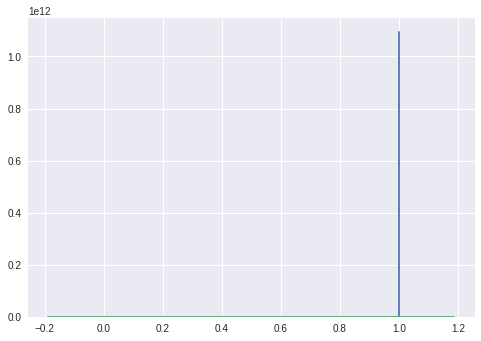

In [0]:
df = pd.DataFrame(data=sample[149])
sns.distplot(df,bins=30)
sns.distplot(Sample_z,bins=30)

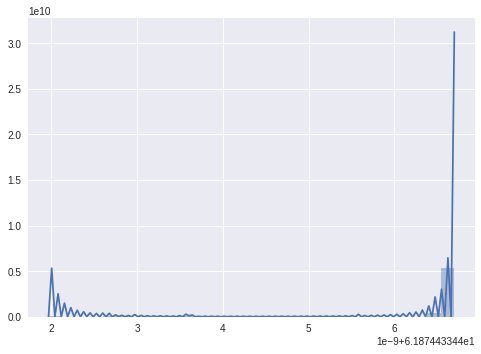

In [0]:
min_max_scaler.fit(X_train)
data1 = min_max_scaler.inverse_transform(sample[149])
sns.distplot(data1,bins=30)

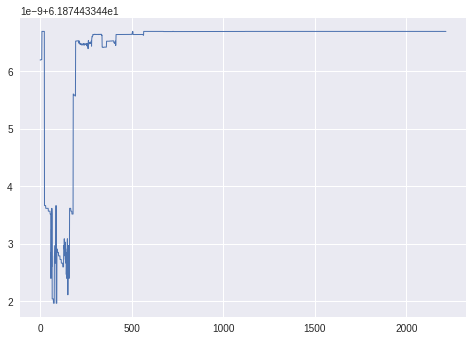

In [0]:
dk =pd.DataFrame(data1)  
t = dk.index
s = data1
line, = plt.plot(t, s, lw=1)

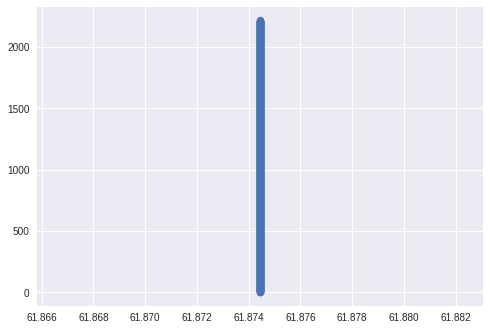

In [0]:
plt.scatter(dk[0], df.index)

***Save model***

In [0]:
saver = tf.train.Saver(var_list = g_vars)


In [0]:
new_samples=[]

In [0]:
start = 0
stop = 2

with tf.Session() as sess:
  saver.restore(sess,'/content/drive/My Drive/Machine_Learning/CSE499VTS/model/Model_test.ckpt')
  
  for x in range(100):
    sample_z = df_normalized_test_noise.values[0:150]
    samples = sample_z
    gen_sample = sess.run(generator(noisey_fuel_data,reuse = True), feed_dict = {noisey_fuel_data:samples})
  
    new_samples.append(gen_sample)
    start = start +1
  

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Machine_Learning/CSE499VTS/model/Model_test.ckpt


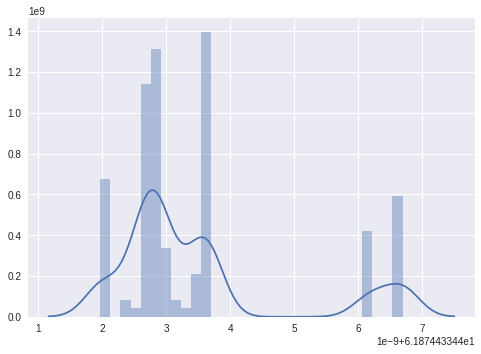

In [0]:
min_max_scaler.fit(X_train)
data2 = min_max_scaler.inverse_transform(new_samples[50])
sns.distplot(data2,bins=30)


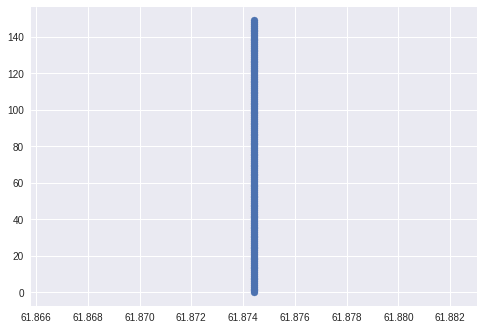

In [0]:
data23 =pd.DataFrame(data2)  

plt.scatter(data23[0], data23.index)